In [2]:
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
import gc, os
import time
from datetime import datetime
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False #中文
pd.set_option("display.float_format", lambda x: "%.3f" % x) #避免显示问题，设置不显示科学计数法

In [3]:
embedding_data = pd.read_csv("./articles_emb.csv")
embedding_data_feature = embedding_data.iloc[:,1:]

In [4]:
from sklearn.decomposition import PCA
pca_cpu = PCA(n_components=2)
pca_cpu_re = pca_cpu.fit(embedding_data_feature)
embedding_data_feature_new = pca_cpu_re.transform(embedding_data_feature)
embedding_data_feature_new

array([[-2.17676422, -1.31685161],
       [-1.73514263,  0.48981026],
       [-0.91269049, -2.08940781],
       ...,
       [ 1.56411549,  4.05328197],
       [ 4.86636169,  0.15171673],
       [ 1.18054101,  3.04040058]])

In [5]:
pca_cpu_re.explained_variance_ratio_

array([0.09248697, 0.07410165])

In [6]:
pca_cpu_re.explained_variance_ratio_.sum()

0.16658861570461708

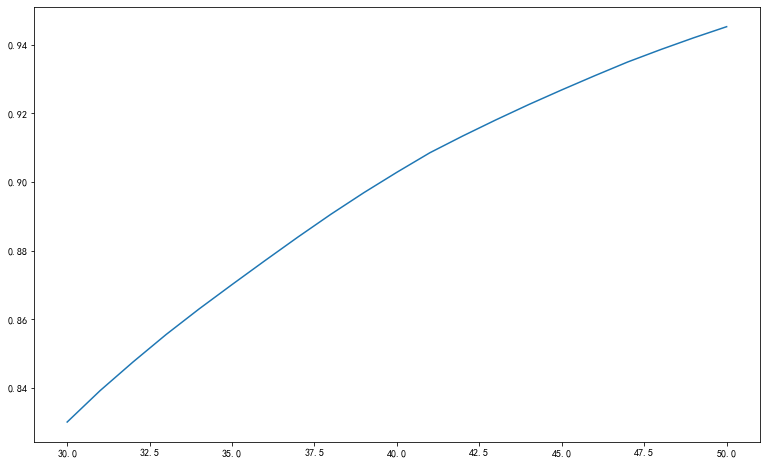

In [12]:
vari_cumsum = []
n_components_scope = range(30,51,1)
for i in n_components_scope:
    pca_cpu = PCA(n_components=i)
    pca_cpu_re = pca_cpu.fit(embedding_data_feature)
    embedding_data_feature_new = pca_cpu_re.transform(embedding_data_feature)
    vari_cumsum.append(pca_cpu_re.explained_variance_ratio_.sum())
plt.figure(figsize=(13,8))
plt.plot(n_components_scope,vari_cumsum,label = "降维保留元素曲线")

In [13]:
print("看来选41比较合适！")

看来选41比较合适！


In [14]:
pca_cpu = PCA(n_components=41)
pca_cpu_re = pca_cpu.fit(embedding_data_feature)
embedding_data_feature_new_final = pca_cpu_re.transform(embedding_data_feature)
embedding_data_feature_new_final

array([[-2.17678188, -1.31691312, -1.02905122, ..., -0.03340859,
        -0.31824855, -0.09665578],
       [-1.73517834,  0.4898928 ,  3.26856251, ..., -0.76704912,
         0.43697559,  0.21269259],
       [-0.91269183, -2.08933926,  1.86587099, ...,  0.37150933,
         0.25137592, -0.75385866],
       ...,
       [ 1.56412686,  4.0533476 ,  2.13453725, ...,  0.72472617,
         1.22035968, -0.46618573],
       [ 4.86636758,  0.15183162, -0.42444092, ...,  0.33635329,
         0.6249739 , -0.55039726],
       [ 1.18052289,  3.04048777, -2.86296012, ...,  0.36122253,
        -0.76204418, -0.72398147]])

In [31]:
new_embedding = pd.DataFrame(embedding_data_feature_new_final)
new_embedding_df = pd.concat([embedding_data["article_id"],new_embedding],axis=1)
new_embedding_df.columns = list(embedding_data.columns[0:42])
new_embedding_df.to_csv("./articles_emb_new.csv",index = False, encoding='utf8')